In [1]:
import sys
sys.path.insert(0, '..')

%load_ext tools.prov_magics
import tools.view.mutable_prov

3


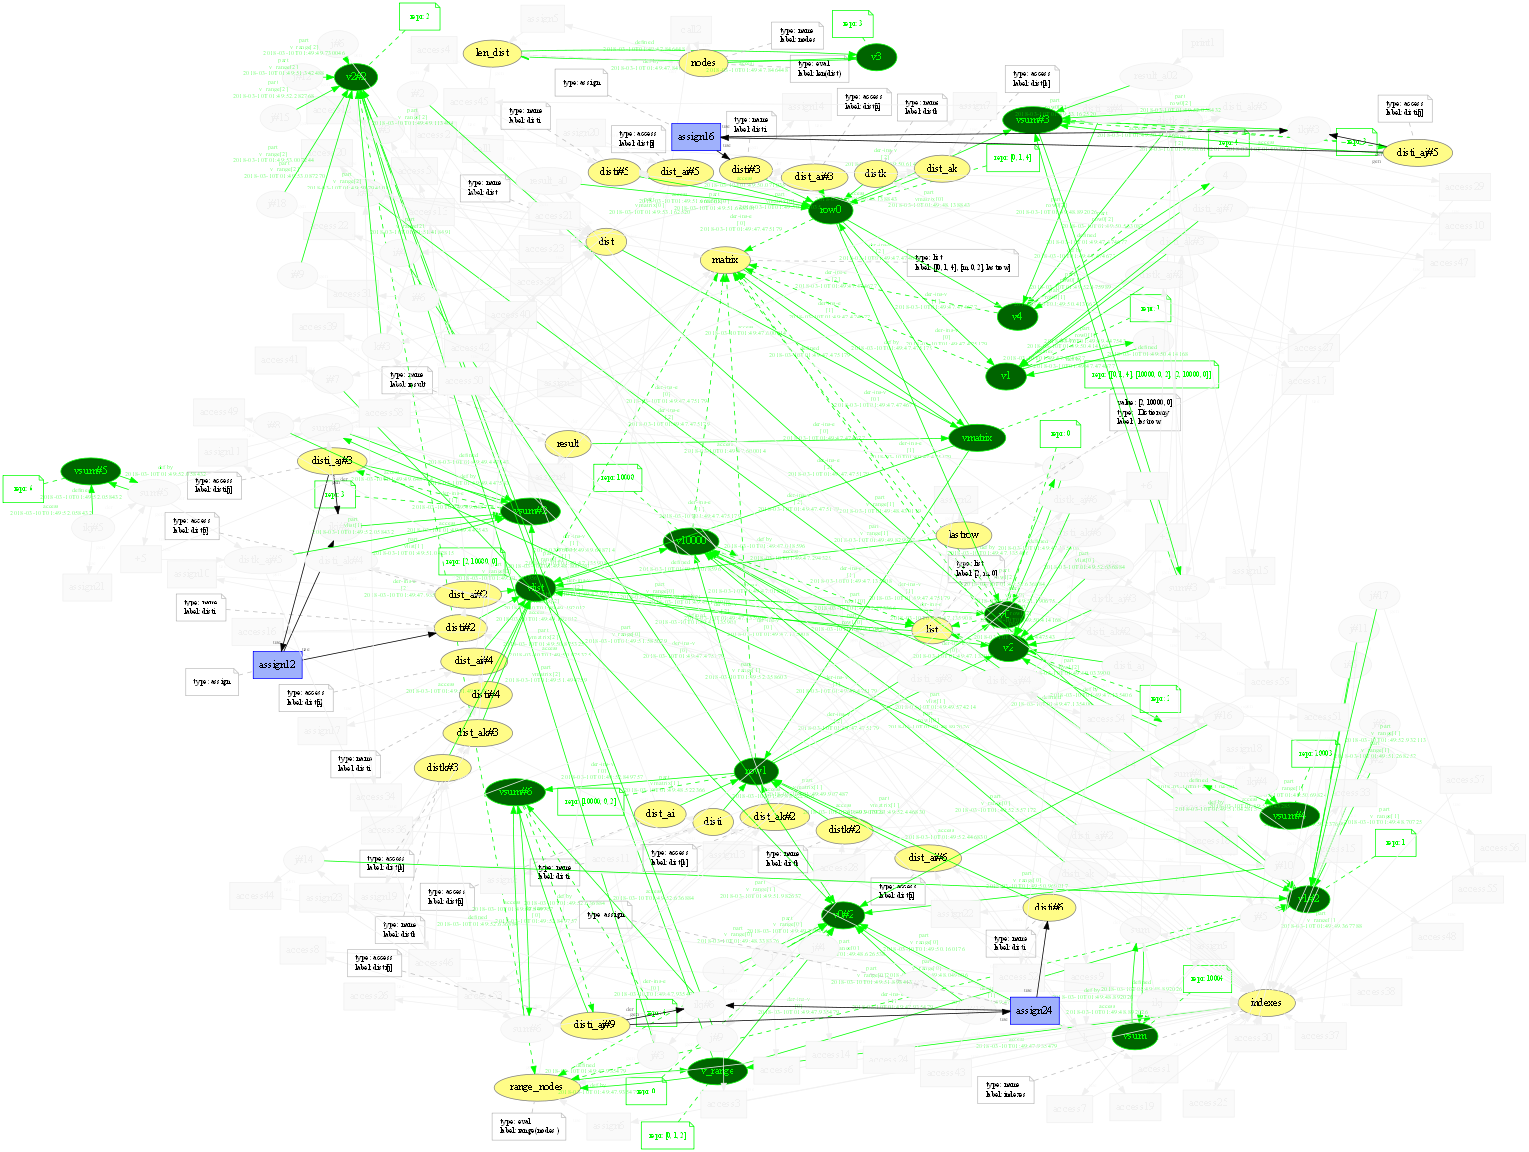

{'all': {2: [('entity', 2),
             ('value', 1),
             ('defined', 1),
             ('wasDefinedBy', 1),
             ('activity', 1),
             ('wasDerivedFrom', 1),
             ('accessed', 1)],
         3: [('entity', 4),
             ('value', 3),
             ('defined', 3),
             ('wasDefinedBy', 3),
             ('derivedByInsertion', 1),
             ('activity', 1),
             ('wasDerivedFrom', 1),
             ('accessed', 1)],
         4: [('entity', 5),
             ('value', 5),
             ('defined', 3),
             ('wasDefinedBy', 3),
             ('derivedByInsertion', 3),
             ('accessed', 2),
             ('activity', 2),
             ('wasDerivedFrom', 2)],
         10: [('entity', 2),
              ('activity', 2),
              ('value', 1),
              ('defined', 1),
              ('wasDefinedBy', 1),
              ('used', 1),
              ('wasGeneratedBy', 1),
              ('accessed', 1),
              ('wasDerivedF

In [2]:
import importlib
import tools.annotations as prov
importlib.reload(prov)
%run mut_floydwarshall.py